# Deep learning loss functions

Inline plots:

In [1]:
%matplotlib inline

We want to use `Theano` so that we can use it's auto-differentiation, since I'm too lazy to work out the derivatives of these functions by hand! :)

We also want to avoid the overhead of using the GPU for such small tasks, so tell Theano to use the CPU:

In [2]:
import os

In [3]:
import numpy as np
import pandas as pd
import torch, torch.nn as nn, torch.nn.functional as F
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

EPSILON = 1.0e-12

SAVE_PLOTS = True

### Classification: softmax non-linearity with negative log loss

Define a convenience function for computing the gradient of negative log loss with softmax. We use PyTorch to do it as it handles computing the gradient for us.

In [4]:
# Softmax function
def f_softmax(logits, axis=1):
    ex = np.exp(logits)
    return ex / ex.sum(axis=axis, keepdims=True)

# Classification loss: negative log of softmax
def f_clf_loss(logits, axis=1):
    t_logits = torch.tensor(logits, requires_grad=True)
    # Compute negative log-softmax
    return -F.log_softmax(t_logits, dim=axis).detach().numpy()

# Gadient of classification loss
def f_clf_loss_grad(logits, target, axis=1):
    t_logits = torch.tensor(logits, requires_grad=True)
    t_targets = torch.tensor(target, dtype=torch.int64)
    # Compute cross_entropy loss
    loss = F.cross_entropy(t_logits, t_targets, reduction='sum')
    # Sum and compute gradient
    loss.backward()
    return t_logits.grad.detach().numpy()


Apply:

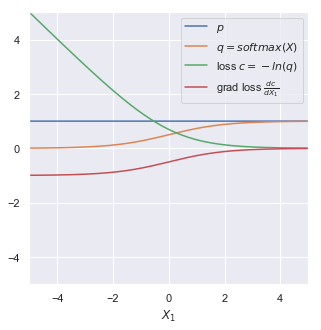

In [5]:
# Compute the range of values that we wish to explore
xs = np.arange(-5.0, 5.001, 1.0/128.0).astype(np.float32)

# Build an array of logit vector, where each logit vector is for a 2-class problem with the values [0, x[i]]
logits = np.stack([np.zeros_like(xs), xs], axis=1)

# Use softmax to compute predicted probabilities:
clf_q = f_softmax(logits)

# Compute negative log loss of softmax:
clf_loss = f_clf_loss(logits)

# Compute gradient of negative log loss of softmax with respect to the logits:
clf_loss_grad = f_clf_loss_grad(logits, np.ones_like(xs))

plt.figure(figsize=(5, 5))
plt.xlim(-5.0, 5.0)
plt.ylim(-5.0, 5.0)
line_p, = plt.plot(xs, np.ones_like(xs), label=r'$p$')
line_q, = plt.plot(xs, clf_q[:, 1], label=r'$q = softmax(X)$')
line_loss, = plt.plot(xs, clf_loss[:, 1], label=r'loss $c =-ln(q)$')
line_loss_grad, = plt.plot(xs, clf_loss_grad[:, 1], label=r'grad loss $\frac{dc}{dX_1}$')
plt.legend(handles=[line_p, line_q, line_loss, line_loss_grad])
plt.xlabel(r'$X_1$')
plt.show()

if SAVE_PLOTS:
    plt.figure(figsize=(5, 5))
    plt.xlim(-5.0, 5.0)
    plt.ylim(-5.0, 5.0)
    line_p, = plt.plot(xs, np.ones_like(xs), label=r'$p$')
    line_q, = plt.plot(xs, clf_q[:, 1], label=r'$q = softmax(X)$')
    plt.legend(handles=[line_p, line_q])
    plt.xlabel(r'$X_1$')
    plt.savefig('clf_loss_0.png', dpi=600)
    plt.close()

    plt.figure(figsize=(5, 5))
    plt.xlim(-5.0, 5.0)
    plt.ylim(-5.0, 5.0)
    line_p, = plt.plot(xs, np.ones_like(xs), label=r'$p$')
    line_q, = plt.plot(xs, clf_q[:, 1], label=r'$q = softmax(X)$')
    line_loss, = plt.plot(xs, clf_loss[:, 1], label=r'loss $c =-ln(q)$')
    plt.legend(handles=[line_p, line_q, line_loss])
    plt.xlabel(r'$X_1$')
    plt.savefig('clf_loss_1.png', dpi=600)
    plt.close()

    plt.figure(figsize=(5, 5))
    plt.xlim(-5.0, 5.0)
    plt.ylim(-5.0, 5.0)
    line_p, = plt.plot(xs, np.ones_like(xs), label=r'$p$')
    line_q, = plt.plot(xs, clf_q[:, 1], label=r'$q = softmax(X)$')
    line_loss, = plt.plot(xs, clf_loss[:, 1], label=r'loss $c =-ln(q)$')
    line_loss_grad, = plt.plot(xs, clf_loss_grad[:, 1], label=r'grad loss $\frac{dc}{dX_1}$')
    plt.legend(handles=[line_p, line_q, line_loss, line_loss_grad])
    plt.xlabel(r'$X_1$')
    plt.savefig('clf_loss_2.png', dpi=600)
    plt.close()

### Probability regression: sigmoid non-linearity with binary cross-entropy

First define functions for computing sigmoid and binary cross-entropy:

In [6]:
# Sigmoid definition
def f_sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def f_prob_regr_loss(q, p):
    return 

# Binary cross-entropy of sigmoid
def f_prob_regr_loss(logits, target):
    t_logits = torch.tensor(logits, requires_grad=True)
    t_target = torch.tensor(target, requires_grad=True)
    loss = -F.binary_cross_entropy_with_logits(t_logits, t_target)
    return loss

# Gadient of binary cross-entropy of sigmoid
def f_prob_regr_loss_grad(logits, target, axis=0):
    t_logits = torch.tensor(logits, requires_grad=True)
    t_target = torch.tensor(target)
    # Compute binary cross-entropy of sigmoid
    loss = -F.binary_cross_entropy_with_logits(t_logits, t_target)
    # Sum and compute gradient
    loss.sum().backward()
    return t_logits.grad.detach().numpy()


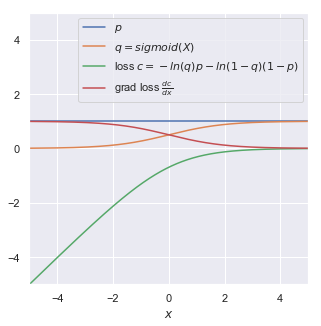

In [7]:
# Compute the range of values that we wish to explore
xs = np.arange(-5.0, 5.0, 0.01).astype(np.float32)

# Use sigmoid to compute predicted probabilities:
prob_regr_q = [f_sigmoid(x) for x in xs]

# Compute binary cross-entropy of sigmoid:
prob_regr_loss = [f_prob_regr_loss(x, 1.0) for x in xs]

# Compute gradient of binary cross-entropy of sigmoid with respect to xs:
prob_regr_loss_grad = [f_prob_regr_loss_grad(x, 1.0) for x in xs]

plt.figure(figsize=(5,5))
plt.xlim(-5.0, 5.0)
plt.ylim(-5.0, 5.0)
line_p, = plt.plot(xs, np.ones_like(xs), label=r'$p$')
line_q, = plt.plot(xs, prob_regr_q, label=r'$q=sigmoid(X)$')
line_loss, = plt.plot(xs, prob_regr_loss, label=r'loss $c =-ln(q)p-ln(1-q)(1-p)$')
line_loss_grad, = plt.plot(xs, prob_regr_loss_grad, label=r'grad loss $\frac{dc}{dx}$')
plt.legend(handles=[line_p, line_q, line_loss, line_loss_grad])
plt.xlabel(r'$x$')
plt.show()

if SAVE_PLOTS:
    plt.figure(figsize=(5, 5))
    plt.xlim(-5.0, 5.0)
    plt.ylim(-5.0, 5.0)
    line_p, = plt.plot(xs, np.ones_like(xs), label=r'$p$')
    line_q, = plt.plot(xs, prob_regr_q, label=r'$q=sigmoid(X)$')
    line_loss, = plt.plot(xs, prob_regr_loss, label=r'loss $c =-ln(q)p-ln(1-q)(1-p)$')
    line_loss_grad, = plt.plot(xs, prob_regr_loss_grad, label=r'grad loss $\frac{dc}{dx}$')
    plt.legend(handles=[line_p, line_q, line_loss, line_loss_grad])
    plt.xlabel(r'$x$')
    plt.savefig('prob_regr_loss_2.png', dpi=600)
    plt.close()


## Regression: no non-linearity and squared error loss

In [8]:
# Function for computing squared error loss
def f_regr_sqr_loss(a, b):
    return (a - b)**2

# Gadient of squared error loss
def f_regr_sqr_loss_grad(x_hat, x):
    t_x_hat = torch.tensor(x_hat, requires_grad=True)
    t_x = torch.tensor(x, requires_grad=True)
    # Compute squared error
    loss = -(t_x_hat - t_x)**2
    # Sum and compute gradient
    loss.sum().backward()
    return t_x.grad.detach().numpy()

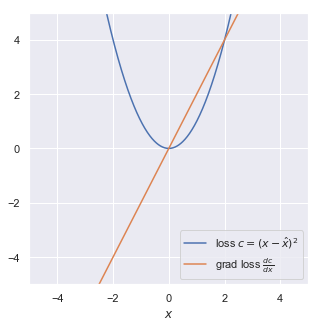

In [9]:
# Compute the range of values that we wish to explore
xs = np.arange(-5.0, 5.0, 0.01).astype(np.float32)

# Use squared error loss:
regr_sqr_loss = [f_regr_sqr_loss(x, 0.0) for x in xs]

# Compute gradient of squared error with respect to x-hat
regr_sqr_loss_grad = [f_regr_sqr_loss_grad(x, 0.0) for x in xs]

plt.figure(figsize=(5,5))
plt.xlim(-5.0, 5.0)
plt.ylim(-5.0, 5.0)
line_loss, = plt.plot(xs, regr_sqr_loss, label=r'loss $c = (x - \hat{x})^2$')
line_loss_grad, = plt.plot(xs, regr_sqr_loss_grad, label=r'grad loss $\frac{dc}{dx}$')
plt.legend(handles=[line_loss, line_loss_grad])
plt.xlabel(r'$x$')
plt.show()

if SAVE_PLOTS:
    plt.figure(figsize=(5, 5))
    plt.xlim(-5.0, 5.0)
    plt.ylim(-5.0, 5.0)
    line_loss, = plt.plot(xs, regr_sqr_loss, label=r'loss $c = (x - \hat{x})^2$')
    line_loss_grad, = plt.plot(xs, regr_sqr_loss_grad, label=r'grad loss $\frac{dc}{dx}$')
    plt.legend(handles=[line_loss, line_loss_grad])
    plt.xlabel(r'$x$')
    plt.savefig('regr_sqr_loss_2.png', dpi=600)
    plt.close()


## Regression: no non-linearity and Huber loss


In [10]:
# Use PyTorch `smooth_l1_loss`
def f_regr_huber_loss(predictions, targets, delta=1.0):
    t_predictions = torch.tensor(predictions, requires_grad=True)
    t_targets = torch.tensor(targets, requires_grad=True)
    # Compute squared error
    return F.smooth_l1_loss(t_predictions, t_targets)

def f_regr_huber_loss_grad(predictions, targets, delta=1.0):
    t_predictions = torch.tensor(predictions, requires_grad=True)
    t_targets = torch.tensor(targets, requires_grad=True)
    # Compute squared error
    loss = F.smooth_l1_loss(t_predictions, t_targets)
    # Sum and compute gradient
    loss.sum().backward()
    return t_predictions.grad.detach().numpy()


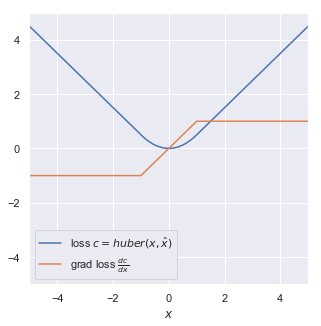

In [11]:
# Compute the range of values that we wish to explore
xs = np.arange(-5.0, 5.0, 0.01).astype(np.float32)

# Use Huber loss:
regr_sqr_loss = [f_regr_huber_loss(x, 0.0) for x in xs]

# Compute gradient of Huber loss with respect to x-hat
regr_sqr_loss_grad = [f_regr_huber_loss_grad(x, 0.0) for x in xs]

plt.figure(figsize=(5,5))
plt.xlim(-5.0, 5.0)
plt.ylim(-5.0, 5.0)
line_loss, = plt.plot(xs, regr_sqr_loss, label=r'loss $c = huber(x, \hat{x})$')
line_loss_grad, = plt.plot(xs, regr_sqr_loss_grad, label=r'grad loss $\frac{dc}{dx}$')
plt.legend(handles=[line_loss, line_loss_grad])
plt.xlabel(r'$x$')
plt.show()

if SAVE_PLOTS:
    plt.figure(figsize=(5, 5))
    plt.xlim(-5.0, 5.0)
    plt.ylim(-5.0, 5.0)
    line_loss, = plt.plot(xs, regr_sqr_loss, label=r'loss $c = huber(x, \hat{x})$')
    line_loss_grad, = plt.plot(xs, regr_sqr_loss_grad, label=r'grad loss $\frac{dc}{dx}$')
    plt.legend(handles=[line_loss, line_loss_grad])
    plt.xlabel(r'$x$')
    plt.savefig('regr_huber_loss_2.png', dpi=600)
    plt.close()


### Show the classification logits and probabilities in tables:

In [12]:
data=np.array(logits)
pd.DataFrame(columns=['$X_0$', '$X_1$'], data=data[::128])

,$X_0$,$X_1$
0,0.0,-5.0
1,0.0,-4.0
2,0.0,-3.0
3,0.0,-2.0
4,0.0,-1.0
5,0.0,0.0
6,0.0,1.0
7,0.0,2.0
8,0.0,3.0
9,0.0,4.0


In [13]:
data=np.append(np.array(logits), np.array(clf_q), axis=1)
pd.DataFrame(columns=['$X_0$', '$X_1$', '$q_0$', '$q_1$'], data=data[::128])

,$X_0$,$X_1$,$q_0$,$q_1$
0,0.0,-5.0,0.993307,0.006693
1,0.0,-4.0,0.982014,0.017986
2,0.0,-3.0,0.952574,0.047426
3,0.0,-2.0,0.880797,0.119203
4,0.0,-1.0,0.731059,0.268941
5,0.0,0.0,0.500000,0.500000
6,0.0,1.0,0.268941,0.731059
7,0.0,2.0,0.119203,0.880797
8,0.0,3.0,0.047426,0.952574
9,0.0,4.0,0.017986,0.982014
